## Part 0

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
dataset = load_dataset("rotten_tomatoes")
train_dataset = dataset['train']
validation_dataset = dataset['validation']
test_dataset = dataset['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Part 1(a)

Install related library

In [ ]:
pip install nltk

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
import contractions
import re
import nltk
import string

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train_dataset['text'][:10]

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
 'effective but too-tepid biopic',
 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
 "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",
 'the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .',
 'offers that rare combination of entertainment and education .',
 'perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .',
 "steers turns i

In [ ]:
set(train_dataset['label'])

{0, 1}

In [ ]:
def replace_punctuation_with_space_except_hyphen(text):
    # Create a translation table to replace all punctuation except hyphen with space
    punctuation_to_replace = string.punctuation.replace('-', '')
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    return text.translate(translation_table)

# Example
sample_text = "Hello, world! This isn't just any test-string."
result = replace_punctuation_with_space_except_hyphen(sample_text)
print(result)


Hello  world  This isn t just any test-string 


In [ ]:
def preprocess_text(text):
  text = text.lower()
  # Turning apostrophes into normal words as much as possible (something like wendy's will not be changed as it refers to a subject)
  # Eg. don't will be turned into do not
  text = contractions.fix(text)

  # Removing substring "'s" from text (because they are tokenised often)
  text = text.replace("'s", "")

  # Replace all punctuation, other than hyphen, with space (removed apostrophe as well due to occurence of words enclosed in quotes)
  text = replace_punctuation_with_space_except_hyphen(text)

  # This is to remove hypen when they are not surrounded by words (eg. too-tepid)
  result = re.sub(r'(?<!\w)-|-(?!\w)', ' ', text)

  return result

In [ ]:
training_text = train_dataset['text']
preprocessed_training_text = []

for text in training_text:
  preprocessed_text = preprocess_text(text)
  preprocessed_training_text.append(preprocessed_text)

In [ ]:
tokens_list = []
for text in preprocessed_training_text:
  tokens = word_tokenize(text)
  tokens_list.extend(tokens)

In [ ]:
# To record the occurence of each vocab
vocab_counts = Counter(tokens_list)

vocab_counts

Counter({'the': 8048,
         'rock': 27,
         'is': 4265,
         'destined': 6,
         'to': 3421,
         'be': 771,
         '21st': 5,
         'century': 16,
         'new': 169,
         'conan': 2,
         'and': 4924,
         'that': 2129,
         'he': 251,
         'going': 77,
         'make': 227,
         'a': 5880,
         'splash': 5,
         'even': 305,
         'greater': 7,
         'than': 529,
         'arnold': 13,
         'schwarzenegger': 9,
         'jean-claud': 1,
         'van': 12,
         'damme': 2,
         'or': 427,
         'steven': 19,
         'segal': 1,
         'gorgeously': 5,
         'elaborate': 6,
         'continuation': 2,
         'of': 4822,
         'lord': 4,
         'rings': 7,
         'trilogy': 4,
         'so': 446,
         'huge': 16,
         'column': 2,
         'words': 19,
         'can': 388,
         'not': 1403,
         'adequately': 4,
         'describe': 5,
         'co-writer': 11,
         'direc

In [ ]:
# Remove duplicate tokens
vocab_list = list(set(tokens_list))

In [ ]:
print(len(tokens_list))
print(len(vocab_list))

160485
17761


## Part 1(b)

In [ ]:
import numpy as np

SEED_VALUE = 42

np.random.seed(SEED_VALUE)

In [ ]:
# Download glove pre-trained embedding and unzip it
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2024-11-10 08:47:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-10 08:47:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-10 08:47:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Create word to index mapping with index start with 1. Index 0 is reserved for padding and 1 reserved for UNK
vocab_index = {
    "<PAD>": 0,
    "<UNK>": 1 }
vocab_index.update({vocab: idx+2 for idx, vocab in enumerate(vocab_list)})

In [ ]:
vocab_index

{'<PAD>': 0,
 '<UNK>': 1,
 'encompassing': 2,
 'strangers': 3,
 'kuras': 4,
 'structured': 5,
 'neglects': 6,
 'dorm': 7,
 '15th': 8,
 'sharpens': 9,
 'b-minus': 10,
 'primarily': 11,
 'adroitly': 12,
 'borders': 13,
 'trash-cinema': 14,
 'independent-community': 15,
 'wade': 16,
 'tron': 17,
 'opening': 18,
 'baffled': 19,
 'liberal': 20,
 'bought': 21,
 'comical': 22,
 'faster': 23,
 'pie': 24,
 'excruciatingly': 25,
 'daughters': 26,
 'groans': 27,
 'sodden': 28,
 'resolution': 29,
 'box': 30,
 'parking': 31,
 'potshots': 32,
 'super': 33,
 'chicago': 34,
 'ample': 35,
 'tuned': 36,
 'languid': 37,
 'j': 38,
 'recordings': 39,
 'organized': 40,
 'napoli': 41,
 'never': 42,
 'guidance': 43,
 'loosens': 44,
 'auto-pilot': 45,
 'fragile': 46,
 'verbinski': 47,
 'puccini': 48,
 'cheese-laced': 49,
 'ghandi': 50,
 'bland': 51,
 'tunney': 52,
 'loving': 53,
 'pastiche': 54,
 'clone': 55,
 'intelligentsia': 56,
 'third-act': 57,
 'depressed': 58,
 'befits': 59,
 'limpid': 60,
 'outselling'

In [ ]:
def embedding_matrix_for_vocab(filepath, word_index, embedding_dim):

  vocab_size = len(word_index)
  embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

  found_words = set()
  oov_words = set()
  oov_count = 0

  with open(filepath, encoding = 'utf8') as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        idx = word_index[word]
        embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
        found_words.add(word)

  # Random vector for oov
  for word, idx in word_index.items():
    if idx>1 and word not in found_words:
      embedding_matrix_vocab[idx] = np.random.normal(size=(embedding_dim,))
      oov_count += 1
      oov_words.add(word)

  unk_index = 1
  embedding_matrix_vocab[unk_index] = np.random.normal(size=(embedding_dim,))
  print(f'Number of OOV words: {oov_count}')

  return embedding_matrix_vocab, oov_words

In [ ]:
embedding_dim = 100
embedding_matrix_vocab, oov_words = embedding_matrix_for_vocab('../content/glove.6B.100d.txt', vocab_index, embedding_dim)

Number of OOV words: 1607


In [ ]:
len(embedding_matrix_vocab)

17763

## Part 1 c)

The best strategy to mitigate the OOV limitation on Glove is to instead represent each word as the average of the vector representation of its character n-grams, along with the word itself. That way, if an OOV word occurs, the embedding for that word is provided by embedding its character n-grams.

Consider the word “equal” and n = 3, then the word will be represented by character n-grams:

< eq, equ, qua, ual, al > and < equal >

So, the word embedding for the word ‘equal’ can be given as the sum of all vector representations of all of its character n-gram and the word itself.

To implement this, we use a word embedding technique called FastText. One of the key features of fastText word representation is its ability to produce vectors for any words, even made-up ones. Indeed, fastText word vectors are built from vectors of substrings of characters contained in it. This allows to build vectors even for misspelled words or concatenation of words.

In [ ]:
!pip install fastText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fastText: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296186 sha256=41b1fe09c4d0ed970c2673defa8bcbf564cfc11c899c7931306ebeede1d6088e
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fastText


In [ ]:
import fasttext

In [ ]:
for i in range(10):
  print(dataset.get("train")[i])

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}
{'text': 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .', 'label': 1}
{'text': 'effective but too-tepid biopic', 'label': 1}
{'text': 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .', 'label': 1}
{'text': "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .", 'label': 1}
{'text': 'the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .', 'label': 1}
{'text': 'offers that rare combination of entertainment and education .', '

In [ ]:
print(len(dataset.get("train")))

8530


In [ ]:
# Supervised Training data file format: __label__<class_name> <text>
train_data = []

for i in range(len(dataset.get("train"))):
  text = ""
  if dataset.get("train")[i]['label'] == 1:
    text = "__label__" + "positive " + dataset.get("train")[i]['text']
  elif dataset.get("train")[i]['label'] == 0:
    text = "__label__" + "negative " + dataset.get("train")[i]['text']
  train_data.append(text)

train_data

['__label__positive the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 '__label__positive the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
 '__label__positive effective but too-tepid biopic',
 '__label__positive if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
 "__label__positive emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",
 '__label__positive the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .',
 '__label__positive offers that rare combination of entertainment and education .',
 '_

In [ ]:
# Unsupervised Training data file format: __label__<class_name> <text>
Unsupervised_train_data = []

for i in range(len(dataset.get("train"))):
  Unsupervised_train_data.append(dataset.get("train")[i]['text'])

Unsupervised_train_data

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
 'effective but too-tepid biopic',
 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
 "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",
 'the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .',
 'offers that rare combination of entertainment and education .',
 'perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .',
 "steers turns i

In [ ]:
# Saving training data to a file (supervised)
with open('train_supervised.txt', 'w') as f:
    for line in train_data:
        f.write(line + '\n')

In [ ]:
# Saving training data to a file (Unsupervised)
with open('train_unsupervised.txt', 'w') as f:
    for line in Unsupervised_train_data:
        f.write(line + '\n')

In [ ]:
# Training the model (supervised)
supervised_model = fasttext.train_supervised(input="train_supervised.txt", epoch=25, lr=0.1, wordNgrams=2, dim=100, loss='softmax')

In [ ]:
# Training the model (unsupervised)
unsupervised_model = fasttext.train_unsupervised(input="train_unsupervised.txt", model='skipgram')

In [ ]:
# Testing the model (supervised)
text_to_predict = "This restaurant serves delicious food!"
predicted_label = supervised_model.predict(text_to_predict)
print(predicted_label)

(('__label__negative',), array([0.58732206]))


In [ ]:
print(supervised_model.get_word_vector('example'))

[ 0.02003836  0.01913946 -0.00217284 -0.01374975  0.03871557  0.0295632
 -0.0228835  -0.00380687  0.02161847  0.0316598  -0.022981    0.00677916
 -0.01362072  0.01935813 -0.01027306 -0.00308777  0.00013161 -0.01235663
 -0.00401234  0.00576297  0.01176541  0.03494454  0.0178574  -0.00101415
 -0.00596238 -0.00830986  0.01449643 -0.01397138 -0.01402616  0.00370708
  0.00064883 -0.00384519 -0.01129932 -0.01218399 -0.03021874 -0.00301087
 -0.00479409 -0.0053885  -0.00328061  0.01313647 -0.02248308  0.02988312
 -0.0007617   0.01388254  0.02681574 -0.01500384  0.01650833  0.00102869
 -0.00817534  0.02302445 -0.03458925 -0.0030818  -0.01781945  0.00959318
 -0.01467391  0.00598686 -0.00636469  0.00457907  0.01076184  0.0113734
 -0.01555383  0.02707553  0.03656652  0.02735003 -0.0153624   0.01063084
 -0.03010985 -0.00530022 -0.00198246 -0.0035904  -0.00395327  0.02039313
  0.01266856 -0.01586729 -0.02038117  0.00895369  0.02693885  0.01631441
  0.01969525 -0.01066481  0.00944393  0.00595892  0.0

In [ ]:
print(supervised_model.get_word_vector('kitty'))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
print(unsupervised_model.get_word_vector('example'))

[-0.07421282  0.33603397 -0.0242832  -0.17240013  0.00977841  0.26044354
 -0.24446215  0.10561958  0.30331773  0.11026864 -0.18236418  0.13884112
 -0.04155397  0.17631002 -0.02599131 -0.15630013 -0.04360167 -0.24119815
  0.10414401  0.05995668  0.23114923  0.5056631   0.19544521 -0.05974611
 -0.20048308 -0.03513082  0.34332114 -0.01708877 -0.17385757  0.076725
  0.04307841  0.02079793 -0.31792936 -0.15210812 -0.16648355  0.15681313
 -0.04452891 -0.11995932 -0.06668399  0.1336284  -0.0210539   0.03762863
 -0.04389913  0.05514739  0.1042375  -0.10923932  0.10068344 -0.09754623
 -0.00747567  0.25816557 -0.3595882   0.16392983 -0.24028127 -0.05844397
 -0.07212558 -0.1296615  -0.29849616  0.18773867  0.24082087  0.20161644
 -0.06028617  0.14788102  0.32916033 -0.02199268 -0.08566444  0.11541753
 -0.30070505 -0.10464662 -0.0192034  -0.11164312 -0.10416997  0.17524883
  0.09242569  0.02182236 -0.05019322  0.04614371  0.17709842  0.2807534
  0.13523439 -0.07607899 -0.05435437  0.05212376  0.26

In [ ]:
print(unsupervised_model.get_word_vector('kitty'))

[-0.05825267  0.26602918 -0.02634677 -0.14058943  0.00676529  0.20693257
 -0.18731262  0.08494161  0.23886073  0.08692317 -0.14115828  0.10758658
 -0.02531155  0.13131389 -0.03649655 -0.12330469 -0.03110471 -0.19117457
  0.08427736  0.04570899  0.17649965  0.39849555  0.15515202 -0.04800915
 -0.15559211 -0.03676648  0.26383626 -0.00285927 -0.14427617  0.05855886
  0.02931981  0.02285934 -0.25070798 -0.12057504 -0.13609374  0.1167496
 -0.02682766 -0.09348433 -0.05731444  0.10101073 -0.03402359  0.0280825
 -0.03984969  0.03600628  0.07600105 -0.0822423   0.07496975 -0.08192611
 -0.00507815  0.21322541 -0.27374524  0.13395123 -0.1773068  -0.05174491
 -0.06063775 -0.11374203 -0.23548594  0.14994724  0.19152151  0.14694136
 -0.04019802  0.11363609  0.2587639  -0.00971539 -0.05771804  0.09764622
 -0.23713805 -0.07806714 -0.00788339 -0.09462493 -0.09035559  0.14218572
  0.07670069  0.01796282 -0.04535525  0.02252533  0.13565251  0.2180725
  0.10603103 -0.06223871 -0.04019866  0.03812748  0.20

The word 'Kitty' does not exist in the corpus, yet the unsupervised model trained using FastText is able to provide a non-zero and non-random vector for the unknown word.

In [ ]:
MIN_COUNT = 3
excluded = [word for word, count in vocab_counts.items() if word in oov_words and count < MIN_COUNT]

# create new word index to remove OOV with occurence less than MIN_COUNT
new_vocab_list = list(set(vocab_list) - set(excluded))
new_vocab_index = {
    "PAD": 0,
    "UNK": 1 }
new_vocab_index.update({vocab: idx+2 for idx, vocab in enumerate(new_vocab_list)})

In [ ]:
#handle oov using fasttext and remove OOV with occurence less than MIN_COUNT [UPDATED]
def embedding_matrix_for_oov(filepath, word_index, embedding_dim,fasttext_model):
  vocab_size = len(word_index)
  embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

  found_words = set()

  with open(filepath, encoding = 'utf8') as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        idx = word_index[word]
        embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
        found_words.add(word)

  # use fasttext for the word that is not found
  for word, idx in word_index.items():
    if idx > 1 and word not in found_words:
      embedding_matrix_vocab[idx] = fasttext_model.get_word_vector(word)

  unk_index = 1
  embedding_matrix_vocab[unk_index] = np.random.normal(size=(embedding_dim,))

  return embedding_matrix_vocab

In [ ]:
embedding_dim = 100
embedding_matrix_vocab_oov = embedding_matrix_for_oov('../content/glove.6B.100d.txt', new_vocab_index, embedding_dim, unsupervised_model)

In [ ]:
len(embedding_matrix_vocab_oov)

16192

In [ ]:
len(new_vocab_index)

16192

# Part 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import itertools
import tensorflow as tf

tf.random.set_seed(SEED_VALUE)

from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Conv1D, Dense, Embedding, Concatenate, Input, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [ ]:
reviews_length = [len(word_tokenize(review)) for review in preprocessed_training_text]

In [ ]:
max_length = max(reviews_length)
min_length = min(reviews_length)

print(f'Max = {max_length}; Min = {min_length}')

Max = 53; Min = 1


In [ ]:
mean = statistics.mean(reviews_length)
median = statistics.median(reviews_length)
print(mean, median)

18.814185228604924 18.0


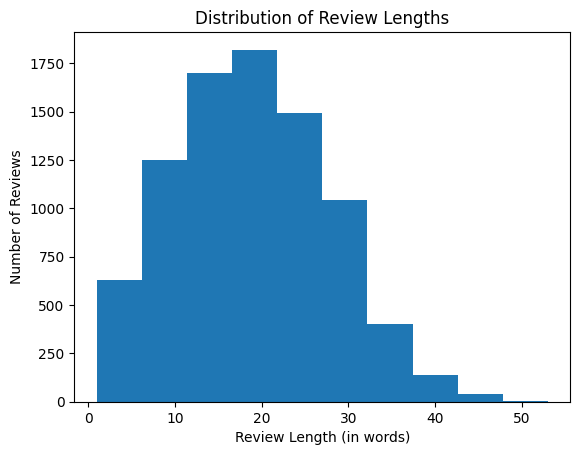

In [ ]:
plt.hist(reviews_length)
plt.xlabel('Review Length (in words)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

It seems that most of the reviews has a length of 15-25. In order to cover most of the reviews we can take 90th percentile of the review length as the max length

In [ ]:
max_len = int(np.percentile(reviews_length, 90))
print(max_len)

31


In [ ]:
# Preprocessed training text will be used here
# Convert sentences into its respective index in vocab_index
def string_to_indices(preprocessed_text, vocab_index, max_length):
  indexed_sequences = []
  for text in preprocessed_text:
    tokens = word_tokenize(text)
    # Replace unknown tokens with index 1
    indices = [vocab_index.get(word, 1) for word in tokens]
    indexed_sequences.append(indices)

  # Ensure each sentence have equal length
  padded_sequences = pad_sequences(indexed_sequences, maxlen=max_length, padding = 'post', truncating = 'post', value = 0)
  return padded_sequences

In [ ]:
# Prepare training and validation dataset
validation_text = validation_dataset['text']
preprocessed_validation_text = []

for text in validation_text:
  preprocessed_text = preprocess_text(text)
  preprocessed_validation_text.append(preprocessed_text)

# Prepare test dataset
test_text = test_dataset['text']
preprocessed_test_text = []

for text in test_text:
  preprocessed_text = preprocess_text(text)
  preprocessed_test_text.append(preprocessed_text)

indexed_training_text = string_to_indices(preprocessed_training_text, vocab_index, max_len)
indexed_validation_text = string_to_indices(preprocessed_validation_text, vocab_index, max_len)
indexed_test_text = string_to_indices(preprocessed_test_text, vocab_index, max_len)

X_train = np.array(indexed_training_text)
y_train = np.array(train_dataset['label'])
X_val = np.array(indexed_validation_text)
y_val = np.array(validation_dataset['label'])
X_test = np.array(indexed_test_text)
y_test = np.array(test_dataset['label'])

In [ ]:
print(preprocessed_validation_text[0])
print(X_val[0])

compassionately explores the seemingly irreconcilable situation between conservative christian parents and their estranged gay and lesbian children  
[13136 16522   956  8299     1  1958   902  3278  6053  5780  9192  6754
     1  6910  9192     1   560     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [ ]:
vocab_size, embedding_dim = embedding_matrix_vocab.shape

In [ ]:
optimizers = ['adam', 'sgd', 'rmsprop']
learning_rates = [0.001, 0.005, 0.01]
batch_sizes = [16, 32, 64]

## Model Training

### Train the RNN with last hidden state

In [ ]:
# Using last hidden state for sentence representation
best_accuracy = 0
best_params = {}

for optimizer_name, lr, batch_size in itertools.product(optimizers, learning_rates, batch_sizes):
  print(f'Training model with optimizer = {optimizer_name}, learning rate = {lr} and batch size = {batch_size}')

  model_last_hidden = Sequential(name = 'Simple_RNN')
  model_last_hidden.add(Embedding(input_dim = vocab_size,
                      output_dim = embedding_dim,
                      input_length = max_len,
                      weights = [embedding_matrix_vocab],
                      trainable = False)) # to freeze the embedding layer
  model_last_hidden.add(SimpleRNN(128, activation = 'tanh', return_sequences=False))
  model_last_hidden.add(Dense(1, activation = 'sigmoid'))

  # model.build(input_shape = (None, max_len))

  if optimizer_name == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)

  elif optimizer_name == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate = lr)

  elif optimizer_name == 'rmsprop':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr)

  # Compile the model
  model_last_hidden.compile(loss = 'binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

  # Define early stopping
  early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

  # Train the model
  history = model_last_hidden.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = batch_size,
                      callbacks = [early_stopping],
                      verbose = 0)

  # Evaluate the model using validation dataset
  val_loss, val_accuracy = model_last_hidden.evaluate(X_val, y_val, verbose = 0)

  print(val_loss, val_accuracy)

  if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_params = {'optimizer' : optimizer_name, 'learning_rate' : lr, 'batch_size' : batch_size}

print(f'Best Validation Accuracy: {best_accuracy}')
print(f'Best combination of hyperparameters:', best_params)

Training model with optimizer = adam, learning rate = 0.001 and batch size = 16
0.6919646263122559 0.49812382459640503
Training model with optimizer = adam, learning rate = 0.001 and batch size = 32
0.6920154690742493 0.5206378698348999
Training model with optimizer = adam, learning rate = 0.001 and batch size = 64
0.6626233458518982 0.6219512224197388
Training model with optimizer = adam, learning rate = 0.005 and batch size = 16
0.7107488512992859 0.504690408706665
Training model with optimizer = adam, learning rate = 0.005 and batch size = 32
0.6929886937141418 0.5112570524215698
Training model with optimizer = adam, learning rate = 0.005 and batch size = 64
0.6980706453323364 0.4924952983856201
Training model with optimizer = adam, learning rate = 0.01 and batch size = 16
0.7892331480979919 0.5
Training model with optimizer = adam, learning rate = 0.01 and batch size = 32
0.693588137626648 0.5
Training model with optimizer = adam, learning rate = 0.01 and batch size = 64
0.69560003

In [ ]:
model_last_hidden = Sequential(name = 'Simple_RNN')
model_last_hidden.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_last_hidden.add(SimpleRNN(128, activation = 'tanh', return_sequences = False))
model_last_hidden.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model_last_hidden.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_last_hidden.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = 32,
                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5010 - loss: 0.7086 - val_accuracy: 0.4991 - val_loss: 0.7111
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5269 - loss: 0.6949 - val_accuracy: 0.5075 - val_loss: 0.7128
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5559 - loss: 0.6859 - val_accuracy: 0.5206 - val_loss: 0.7109
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5688 - loss: 0.6794 - val_accuracy: 0.5328 - val_loss: 0.7167
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.6125 - loss: 0.6561 - val_accuracy: 0.6388 - val_loss: 0.6672
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6548 - loss: 0.6332 - val_accuracy: 0.5563 - val_loss: 0.7157
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6690 - loss: 0.6168 - val_accuracy: 0.5741 - val_loss: 0.7369
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6864 - loss: 0.5909 - val_ac

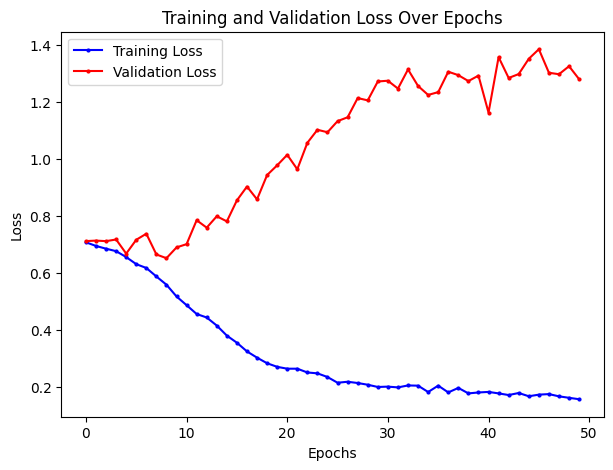

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_last_hidden = Sequential(name = 'Simple_RNN')
model_last_hidden.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_last_hidden.add(SimpleRNN(128, activation = 'tanh', return_sequences = False))
model_last_hidden.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model_last_hidden.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_last_hidden.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = 32,
                      callbacks = [reduce_lr],
                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5375 - loss: 0.7005 - val_accuracy: 0.5375 - val_loss: 0.7029 - learning_rate: 0.0010
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6328 - loss: 0.6499 - val_accuracy: 0.6370 - val_loss: 0.6619 - learning_rate: 0.0010
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6762 - loss: 0.6064 - val_accuracy: 0.5422 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6651 - loss: 0.6177 - val_accuracy: 0.5281 - val_loss: 0.7484 - learning_rate: 0.0010
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6831 - loss: 0.5986 - val_accuracy: 0.6942 - val_loss: 0.6279 - learning_rate: 0.0010
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7187 - loss: 0.5642 - val_accuracy: 0.6088 - val_loss: 0.6747 - learning_rate: 0.0010
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7350 - loss: 0.5413 - val_

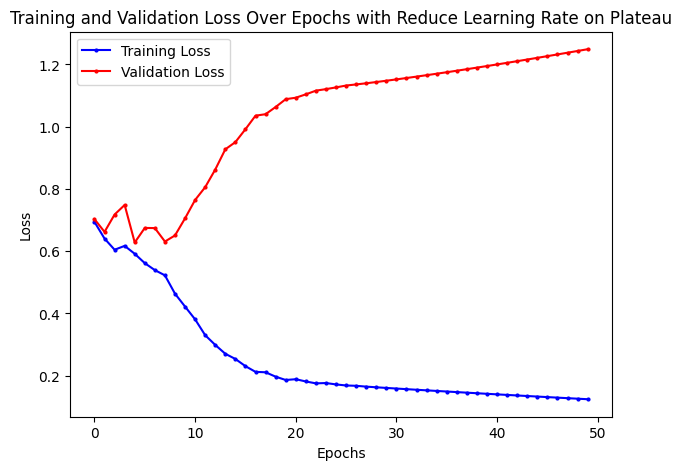

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs with Reduce Learning Rate on Plateau')
plt.legend()
plt.show()

In [ ]:
# Optimal epoch = 10
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_last_hidden = Sequential(name = 'Simple_RNN')
model_last_hidden.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_last_hidden.add(SimpleRNN(128, activation = 'tanh', return_sequences = False))
model_last_hidden.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model_last_hidden.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_last_hidden.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 10,
                      batch_size = 32,
                      callbacks = [early_stopping, reduce_lr],
                      verbose = 1)

val_loss, val_accuracy = model_last_hidden.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_last_hidden.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5102 - loss: 0.7084 - val_accuracy: 0.5009 - val_loss: 0.7360 - learning_rate: 0.0010
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5226 - loss: 0.6940 - val_accuracy: 0.4944 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5864 - loss: 0.6686 - val_accuracy: 0.6398 - val_loss: 0.6510 - learning_rate: 0.0010
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5847 - loss: 0.6694 - val_accuracy: 0.4991 - val_loss: 0.7004 - learning_rate: 0.0010
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6010 - loss: 0.6540 - val_accuracy: 0.4944 - val_loss: 0.7134 - learning_rate: 0.0010
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6314 - loss: 0.6422
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6314 - loss: 0.6

### Train the RNN with max pooling

In [ ]:
# Using max pooling for sentence representation
best_accuracy = 0
best_params = {}

for optimizer_name, lr, batch_size in itertools.product(optimizers, learning_rates, batch_sizes):
  print(f'Training model with optimizer = {optimizer_name}, learning rate = {lr} and batch size = {batch_size}')

  model_max_pooling = Sequential(name = 'Simple_RNN')
  model_max_pooling.add(Embedding(input_dim = vocab_size,
                      output_dim = embedding_dim,
                      input_length = max_len,
                      weights = [embedding_matrix_vocab],
                      trainable = False)) # to freeze the embedding layer
  model_max_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences=True))
  model_max_pooling.add(GlobalMaxPooling1D())
  model_max_pooling.add(Dense(1, activation = 'sigmoid'))

  # model.build(input_shape = (None, max_len))

  if optimizer_name == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)

  elif optimizer_name == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate = lr)

  elif optimizer_name == 'rmsprop':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr)

  # Compile the model
  model_max_pooling.compile(loss = 'binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

  # Define early stopping
  early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

  # Train the model
  history = model_max_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = batch_size,
                      callbacks = [early_stopping],
                      verbose = 0)

  # Evaluate the model using validation dataset
  val_loss, val_accuracy = model_max_pooling.evaluate(X_val, y_val, verbose = 0)

  print(val_loss, val_accuracy)

  if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_params = {'optimizer' : optimizer_name, 'learning_rate' : lr, 'batch_size' : batch_size}

print(f'Best Validation Accuracy: {best_accuracy}')
print(f'Best combination of hyperparameters:', best_params)

Training model with optimizer = adam, learning rate = 0.001 and batch size = 16
0.5842357873916626 0.7063789963722229
Training model with optimizer = adam, learning rate = 0.001 and batch size = 32
0.5126760601997375 0.7495309710502625
Training model with optimizer = adam, learning rate = 0.001 and batch size = 64
0.5463792681694031 0.7195122241973877
Training model with optimizer = adam, learning rate = 0.005 and batch size = 16
0.5501395463943481 0.7195122241973877
Training model with optimizer = adam, learning rate = 0.005 and batch size = 32
0.5536432862281799 0.709193229675293
Training model with optimizer = adam, learning rate = 0.005 and batch size = 64
0.5308555960655212 0.7429643273353577
Training model with optimizer = adam, learning rate = 0.01 and batch size = 16
0.6958051323890686 0.5994371771812439
Training model with optimizer = adam, learning rate = 0.01 and batch size = 32
0.6940081119537354 0.5
Training model with optimizer = adam, learning rate = 0.01 and batch size 

In [ ]:
model_max_pooling = Sequential(name = 'Simple_RNN')
model_max_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_max_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_max_pooling.add(GlobalMaxPooling1D())
model_max_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_max_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_max_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = 32,
                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6001 - loss: 0.6601 - val_accuracy: 0.7045 - val_loss: 0.5758
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7224 - loss: 0.5385 - val_accuracy: 0.7280 - val_loss: 0.5356
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7548 - loss: 0.4916 - val_accuracy: 0.7317 - val_loss: 0.5233
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7834 - loss: 0.4535 - val_accuracy: 0.7251 - val_loss: 0.5276
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8132 - loss: 0.4191 - val_accuracy: 0.7298 - val_loss: 0.5296
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8360 - loss: 0.3843 - val_accuracy: 0.7326 - val_loss: 0.5403
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8589 - loss: 0.3494 - val_accuracy: 0.7364 - val_loss: 0.5526
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8767 - loss: 0.3142 - val_accuracy

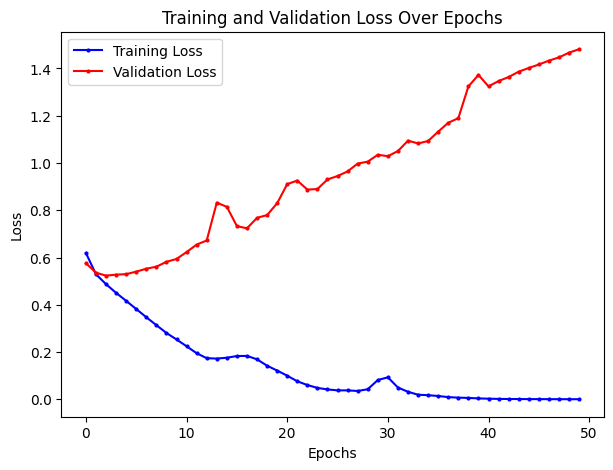

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_max_pooling = Sequential(name = 'Simple_RNN')
model_max_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_max_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_max_pooling.add(GlobalMaxPooling1D())
model_max_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_max_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_max_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = 32,
                      callbacks = [reduce_lr],
                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5835 - loss: 0.6671 - val_accuracy: 0.7233 - val_loss: 0.5798 - learning_rate: 0.0010
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7238 - loss: 0.5504 - val_accuracy: 0.7261 - val_loss: 0.5545 - learning_rate: 0.0010
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7468 - loss: 0.5058 - val_accuracy: 0.7420 - val_loss: 0.5429 - learning_rate: 0.0010
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7732 - loss: 0.4678 - val_accuracy: 0.7336 - val_loss: 0.5396 - learning_rate: 0.0010
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7997 - loss: 0.4346 - val_accuracy: 0.7317 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8232 - loss: 0.4004 - val_accuracy: 0.7345 - val_loss: 0.5342 - learning_rate: 0.0010
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8449 - loss: 0.3687 -

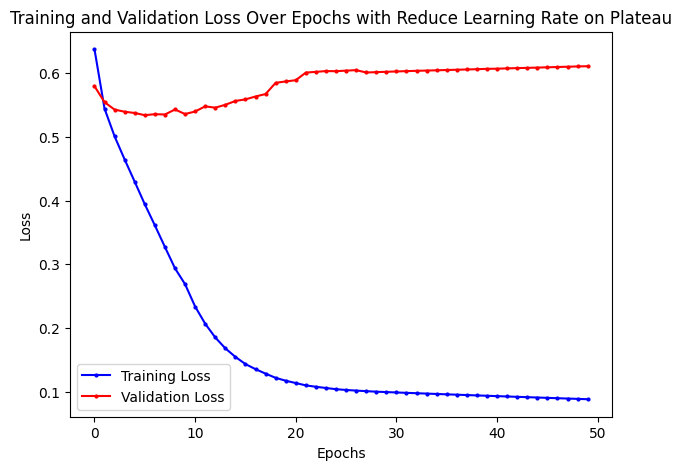

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs with Reduce Learning Rate on Plateau')
plt.legend()
plt.show()

In [ ]:
# Optimal epoch = 15
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_max_pooling = Sequential(name = 'Simple_RNN')
model_max_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_max_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_max_pooling.add(GlobalMaxPooling1D())
model_max_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_max_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_max_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 15,
                      batch_size = 32,
                      callbacks = [early_stopping, reduce_lr],
                      verbose = 1)

val_loss, val_accuracy = model_max_pooling.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_max_pooling.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6114 - loss: 0.6511 - val_accuracy: 0.6839 - val_loss: 0.5823 - learning_rate: 0.0010
Epoch 2/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7259 - loss: 0.5374 - val_accuracy: 0.7242 - val_loss: 0.5393 - learning_rate: 0.0010
Epoch 3/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7602 - loss: 0.4938 - val_accuracy: 0.7392 - val_loss: 0.5284 - learning_rate: 0.0010
Epoch 4/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7795 - loss: 0.4593 - val_accuracy: 0.7486 - val_loss: 0.5193 - learning_rate: 0.0010
Epoch 5/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8038 - loss: 0.4272 - val_accuracy: 0.7439 - val_loss: 0.5189 - learning_rate: 0.0010
Epoch 6/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8271 - loss: 0.3935 - val_accuracy: 0.7411 - val_loss: 0.5192 - learning_rate: 0.0010
Epoch 7/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8560 - loss: 0.3

### Train the RNN with average pooling

In [ ]:
# Using max pooling for sentence representation
best_accuracy = 0
best_params = {}

for optimizer_name, lr, batch_size in itertools.product(optimizers, learning_rates, batch_sizes):
  print(f'Training model with optimizer = {optimizer_name}, learning rate = {lr} and batch size = {batch_size}')

  model_avg_pooling = Sequential(name = 'Simple_RNN')
  model_avg_pooling.add(Embedding(input_dim = vocab_size,
                      output_dim = embedding_dim,
                      input_length = max_len,
                      weights = [embedding_matrix_vocab],
                      trainable = False)) # To freeze the embedding layer
  model_avg_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences=True))
  model_avg_pooling.add(GlobalAveragePooling1D())
  model_avg_pooling.add(Dense(1, activation = 'sigmoid'))

  # model.build(input_shape = (None, max_len))

  if optimizer_name == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)

  elif optimizer_name == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate = lr)

  elif optimizer_name == 'rmsprop':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr)

  # Compile the model
  model_avg_pooling.compile(loss = 'binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

  # Define early stopping
  early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

  # Train the model
  history = model_avg_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = batch_size,
                      callbacks = [early_stopping],
                      verbose = 0)

  # Evaluate the model using validation dataset
  val_loss, val_accuracy = model_avg_pooling.evaluate(X_val, y_val, verbose = 0)

  print(val_loss, val_accuracy)

  if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_params = {'optimizer' : optimizer_name, 'learning_rate' : lr, 'batch_size' : batch_size}

print(f'Best Validation Accuracy: {best_accuracy}')
print(f'Best combination of hyperparameters:', best_params)

Training model with optimizer = adam, learning rate = 0.001 and batch size = 16
0.5146127939224243 0.7448405027389526
Training model with optimizer = adam, learning rate = 0.001 and batch size = 32
0.5380761623382568 0.7251406908035278
Training model with optimizer = adam, learning rate = 0.001 and batch size = 64
0.5558216571807861 0.7213883399963379
Training model with optimizer = adam, learning rate = 0.005 and batch size = 16
0.5710090398788452 0.7148217558860779
Training model with optimizer = adam, learning rate = 0.005 and batch size = 32
0.5304405689239502 0.7382739186286926
Training model with optimizer = adam, learning rate = 0.005 and batch size = 64
0.5541751384735107 0.7213883399963379
Training model with optimizer = adam, learning rate = 0.01 and batch size = 16
0.6266875863075256 0.6482176184654236
Training model with optimizer = adam, learning rate = 0.01 and batch size = 32
0.5791818499565125 0.6932457685470581
Training model with optimizer = adam, learning rate = 0.01

In [ ]:
model_avg_pooling = Sequential(name = 'Simple_RNN')
model_avg_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_avg_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_avg_pooling.add(GlobalAveragePooling1D())
model_avg_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_avg_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_avg_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = 16,
                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6043 - loss: 0.6585 - val_accuracy: 0.6951 - val_loss: 0.5823
Epoch 2/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6973 - loss: 0.5765 - val_accuracy: 0.6998 - val_loss: 0.5704
Epoch 3/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7168 - loss: 0.5573 - val_accuracy: 0.6904 - val_loss: 0.5785
Epoch 4/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7261 - loss: 0.5384 - val_accuracy: 0.7092 - val_loss: 0.5645
Epoch 5/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7363 - loss: 0.5213 - val_accuracy: 0.6904 - val_loss: 0.5772
Epoch 6/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7488 - loss: 0.5016 - val_accuracy: 0.7233 - val_loss: 0.5499
Epoch 7/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7633 - loss: 0.4854 - val_accuracy: 0.7308 - val_loss: 0.5480
Epoch 8/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7636 - loss: 0.4775 - val_a

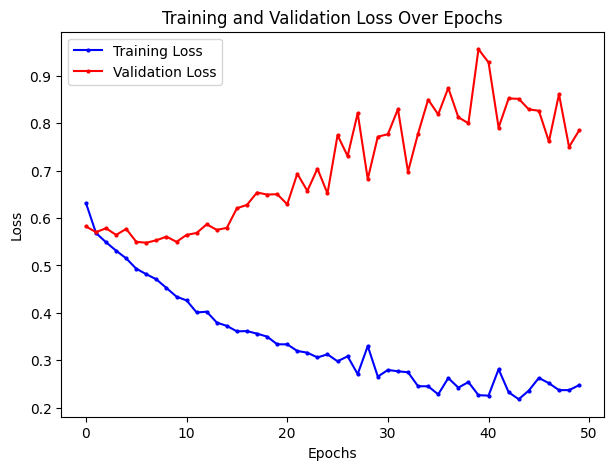

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7, 5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_avg_pooling = Sequential(name = 'Simple_RNN')
model_avg_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_avg_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_avg_pooling.add(GlobalAveragePooling1D())
model_avg_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_avg_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_avg_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 50,
                      batch_size = 16,
                      callbacks = [reduce_lr],
                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6022 - loss: 0.6599 - val_accuracy: 0.7026 - val_loss: 0.5894 - learning_rate: 0.0010
Epoch 2/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7007 - loss: 0.5777 - val_accuracy: 0.7214 - val_loss: 0.5499 - learning_rate: 0.0010
Epoch 3/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7118 - loss: 0.5589 - val_accuracy: 0.7205 - val_loss: 0.5472 - learning_rate: 0.0010
Epoch 4/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7183 - loss: 0.5473 - val_accuracy: 0.7195 - val_loss: 0.5469 - learning_rate: 0.0010
Epoch 5/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7313 - loss: 0.5401 - val_accuracy: 0.7383 - val_loss: 0.5453 - learning_rate: 0.0010
Epoch 6/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7362 - loss: 0.5403 - val_accuracy: 0.7345 - val_loss: 0.5358 - learning_rate: 0.0010
Epoch 7/50
534/534 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7305 - loss

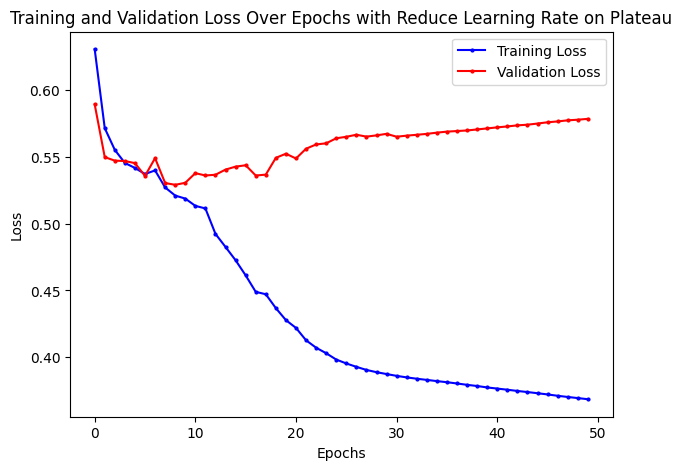

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7, 5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs with Reduce Learning Rate on Plateau')
plt.legend()
plt.show()

In [ ]:
# Optimal epoch = 15
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_avg_pooling = Sequential(name = 'Simple_RNN')
model_avg_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = False)) # to freeze the embedding layer

model_avg_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_avg_pooling.add(GlobalAveragePooling1D())
model_avg_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_avg_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_avg_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 15,
                      batch_size = 16,
                      callbacks = [early_stopping, reduce_lr],
                      verbose = 1)

val_loss, val_accuracy = model_avg_pooling.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_avg_pooling.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/15
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5991 - loss: 0.6646 - val_accuracy: 0.6904 - val_loss: 0.6318 - learning_rate: 0.0010
Epoch 2/15
534/534 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6778 - loss: 0.5940 - val_accuracy: 0.7251 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 3/15
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7197 - loss: 0.5586 - val_accuracy: 0.7261 - val_loss: 0.5408 - learning_rate: 0.0010
Epoch 4/15
534/534 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7297 - loss: 0.5418 - val_accuracy: 0.7223 - val_loss: 0.5311 - learning_rate: 0.0010
Epoch 5/15
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7400 - loss: 0.5220 - val_accuracy: 0.7289 - val_loss: 0.5344 - learning_rate: 0.0010
Epoch 6/15
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7521 - loss: 0.5060 - val_accuracy: 0.7139 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 7/15
533/534 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7562 - loss: 0.

### Train the RNN model with the concatenation of average and max pooling

In [ ]:
# Using max pooling for sentence representation
best_accuracy = 0
best_params = {}

for optimizer_name, lr, batch_size in itertools.product(optimizers, learning_rates, batch_sizes):
  print(f'Training model with optimizer = {optimizer_name}, learning rate = {lr} and batch size = {batch_size}')

  input_layer = Input(shape=(max_len,), name='Input')

  embedding_layer = Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              input_length=max_len,
                              weights=[embedding_matrix_vocab],
                              trainable=False)(input_layer)

  rnn_output = SimpleRNN(128, activation='tanh', return_sequences=True)(embedding_layer)

  max_pool = GlobalMaxPooling1D()(rnn_output)
  avg_pool = GlobalAveragePooling1D()(rnn_output)

  concatenated = Concatenate()([max_pool, avg_pool])

  output_layer = Dense(1, activation='sigmoid')(concatenated)

  model_max_avg_pooling = Model(inputs=input_layer, outputs=output_layer, name='Simple_RNN_MaxAvgPooling')

  if optimizer_name == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)

  elif optimizer_name == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate = lr)

  elif optimizer_name == 'rmsprop':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr)

  # Compile the model
  model_max_avg_pooling.compile(loss = 'binary_crossentropy',
                                optimizer = optimizer,
                                metrics = ['accuracy'])

  # Define early stopping
  early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

  # Train the model
  history = model_max_avg_pooling.fit(X_train, y_train,
                                      validation_data = (X_val, y_val),
                                      epochs = 50,
                                      batch_size = batch_size,
                                      callbacks = [early_stopping],
                                      verbose = 0)

  # Evaluate the model using validation dataset
  val_loss, val_accuracy = model_max_avg_pooling.evaluate(X_val, y_val, verbose = 0)

  print(val_loss, val_accuracy)

  if val_accuracy > best_accuracy:
    best_accuracy = val_accuracy
    best_params = {'optimizer' : optimizer_name, 'learning_rate' : lr, 'batch_size' : batch_size}

print(f'Best Validation Accuracy: {best_accuracy}')
print(f'Best combination of hyperparameters:', best_params)

Training model with optimizer = adam, learning rate = 0.001 and batch size = 16


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


0.5529637932777405 0.7204502820968628
Training model with optimizer = adam, learning rate = 0.001 and batch size = 32
0.5257256031036377 0.7410881519317627
Training model with optimizer = adam, learning rate = 0.001 and batch size = 64
0.5205147862434387 0.7467166781425476
Training model with optimizer = adam, learning rate = 0.005 and batch size = 16
0.6371737718582153 0.6632270216941833
Training model with optimizer = adam, learning rate = 0.005 and batch size = 32
0.5693387389183044 0.7138836979866028
Training model with optimizer = adam, learning rate = 0.005 and batch size = 64
0.5054736733436584 0.7476547956466675
Training model with optimizer = adam, learning rate = 0.01 and batch size = 16
0.5717304348945618 0.702626645565033
Training model with optimizer = adam, learning rate = 0.01 and batch size = 32
0.6423668265342712 0.6425890922546387
Training model with optimizer = adam, learning rate = 0.01 and batch size = 64
0.5424318909645081 0.7345215678215027
Training model with op

In [ ]:
input_layer = Input(shape=(max_len,), name='Input')

embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len,
                            weights=[embedding_matrix_vocab],
                            trainable=False)(input_layer)

rnn_output = SimpleRNN(128, activation='tanh', return_sequences=True)(embedding_layer)

max_pool = GlobalMaxPooling1D()(rnn_output)
avg_pool = GlobalAveragePooling1D()(rnn_output)

concatenated = Concatenate()([max_pool, avg_pool])

output_layer = Dense(1, activation='sigmoid')(concatenated)

model_max_avg_pooling = Model(inputs=input_layer, outputs=output_layer, name='Simple_RNN_MaxAvgPooling')

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.005)

model_max_avg_pooling.compile(loss = 'binary_crossentropy',
                                optimizer = optimizer,
                                metrics = ['accuracy'])

history = model_max_avg_pooling.fit(X_train, y_train,
                                    validation_data = (X_val, y_val),
                                    epochs = 50,
                                    batch_size = 64,
                                    verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5241 - loss: 0.7965 - val_accuracy: 0.5525 - val_loss: 0.6598
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6048 - loss: 0.6798 - val_accuracy: 0.5872 - val_loss: 0.7349
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6514 - loss: 0.6238 - val_accuracy: 0.7120 - val_loss: 0.5823
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7080 - loss: 0.5690 - val_accuracy: 0.7373 - val_loss: 0.5321
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7229 - loss: 0.5371 - val_accuracy: 0.7261 - val_loss: 0.5304
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7409 - loss: 0.5093 - val_accuracy: 0.7326 - val_loss: 0.5501
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7613 - loss: 0.4926 - val_accuracy: 0.7280 - val_loss: 0.5334
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7735 - loss: 0.4794 - val_accuracy: 0.7355 - val

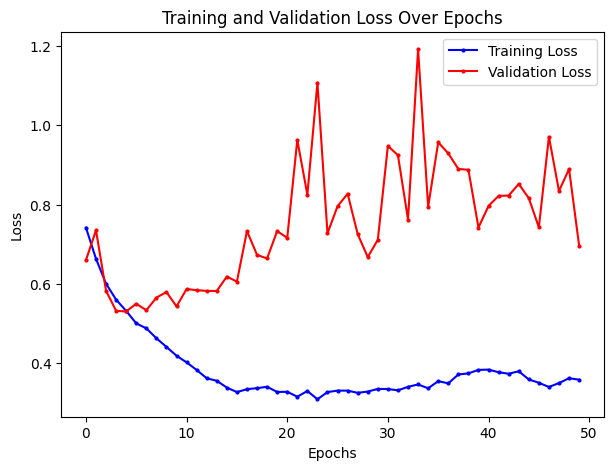

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

input_layer = Input(shape=(max_len,), name='Input')

embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len,
                            weights=[embedding_matrix_vocab],
                            trainable=False)(input_layer)

rnn_output = SimpleRNN(128, activation='tanh', return_sequences=True)(embedding_layer)

max_pool = GlobalMaxPooling1D()(rnn_output)
avg_pool = GlobalAveragePooling1D()(rnn_output)

concatenated = Concatenate()([max_pool, avg_pool])

output_layer = Dense(1, activation='sigmoid')(concatenated)

model_max_avg_pooling = Model(inputs=input_layer, outputs=output_layer, name='Simple_RNN_MaxAvgPooling')

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.005)

model_max_avg_pooling.compile(loss = 'binary_crossentropy',
                                optimizer = optimizer,
                                metrics = ['accuracy'])

history = model_max_avg_pooling.fit(X_train, y_train,
                                      validation_data = (X_val, y_val),
                                      epochs = 50,
                                      batch_size = 64,
                                      callbacks = [reduce_lr],
                                      verbose = 1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5350 - loss: 0.7496 - val_accuracy: 0.5422 - val_loss: 0.6864 - learning_rate: 0.0050
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6136 - loss: 0.6563 - val_accuracy: 0.6942 - val_loss: 0.5961 - learning_rate: 0.0050
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6607 - loss: 0.6106 - val_accuracy: 0.6735 - val_loss: 0.6057 - learning_rate: 0.0050
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6772 - loss: 0.5974 - val_accuracy: 0.6904 - val_loss: 0.5811 - learning_rate: 0.0050
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6825 - loss: 0.5828 - val_accuracy: 0.7186 - val_loss: 0.5612 - learning_rate: 0.0050
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6890 - loss: 0.5823 - val_accuracy: 0.7280 - val_loss: 0.5543 - learning_rate: 0.0050
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6907 - loss: 0.5802 - val_accura

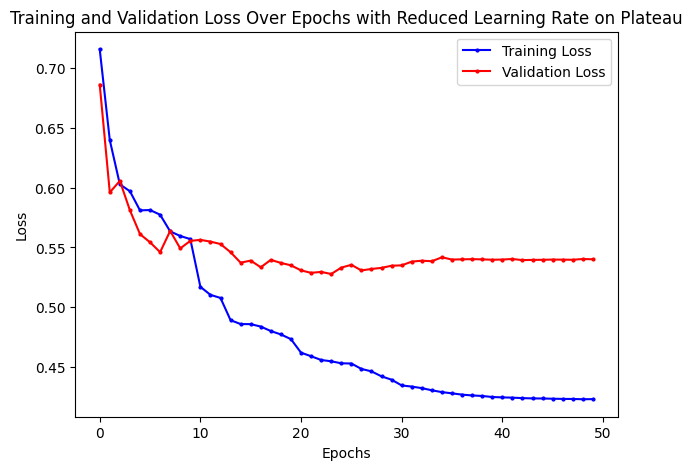

In [ ]:
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(train_loss, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(val_loss, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs with Reduced Learning Rate on Plateau')
plt.legend()
plt.show()

In [ ]:
# Optimal epoch = 30
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

input_layer = Input(shape=(max_len,), name='Input')

embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len,
                            weights=[embedding_matrix_vocab],
                            trainable=False)(input_layer)

rnn_output = SimpleRNN(128, activation='tanh', return_sequences=True)(embedding_layer)

max_pool = GlobalMaxPooling1D()(rnn_output)
avg_pool = GlobalAveragePooling1D()(rnn_output)

concatenated = Concatenate()([max_pool, avg_pool])

output_layer = Dense(1, activation='sigmoid')(concatenated)

model_max_avg_pooling = Model(inputs=input_layer, outputs=output_layer, name='Simple_RNN_MaxAvgPooling')

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005)

model_max_avg_pooling.compile(loss = 'binary_crossentropy',
                                optimizer = optimizer,
                                metrics = ['accuracy'])

history = model_max_avg_pooling.fit(X_train, y_train,
                                      validation_data = (X_val, y_val),
                                      epochs = 30,
                                      batch_size = 64,
                                      callbacks = [early_stopping, reduce_lr],
                                      verbose = 1)

val_loss, val_accuracy = model_max_avg_pooling.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_max_avg_pooling.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.5531 - loss: 0.6941 - val_accuracy: 0.7270 - val_loss: 0.5888 - learning_rate: 0.0050
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7021 - loss: 0.5724 - val_accuracy: 0.7270 - val_loss: 0.5536 - learning_rate: 0.0050
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7083 - loss: 0.5604 - val_accuracy: 0.7261 - val_loss: 0.5438 - learning_rate: 0.0050
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7194 - loss: 0.5450 - val_accuracy: 0.7223 - val_loss: 0.5527 - learning_rate: 0.0050
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7193 - loss: 0.5453 - val_accuracy: 0.7373 - val_loss: 0.5458 - learning_rate: 0.0050
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7322 - loss: 0.5321
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7322 - loss: 0.5

## Part 3

### Trainable Layers

In [ ]:
# Optimal epoch = 15
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_max_pooling = Sequential(name = 'Simple_RNN')
model_max_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab],
                    trainable = True)) # to train the embedding layer

model_max_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_max_pooling.add(GlobalMaxPooling1D())
model_max_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_max_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_max_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 15,
                      batch_size = 32,
                      callbacks = [early_stopping, reduce_lr],
                      verbose = 1)

val_loss, val_accuracy = model_max_pooling.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_max_pooling.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5927 - loss: 0.6745 - val_accuracy: 0.7298 - val_loss: 0.5378 - learning_rate: 0.0010
Epoch 2/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7735 - loss: 0.4734 - val_accuracy: 0.7580 - val_loss: 0.4822 - learning_rate: 0.0010
Epoch 3/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8658 - loss: 0.3199 - val_accuracy: 0.7495 - val_loss: 0.4987 - learning_rate: 0.0010
Epoch 4/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9352 - loss: 0.1944 - val_accuracy: 0.7308 - val_loss: 0.6014 - learning_rate: 0.0010
Epoch 5/15
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9687 - loss: 0.1157
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
267/267 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9688 - loss: 0.1156 - val_accuracy: 0.7477 - val_loss: 0.6141 - learning_rate: 0.0010
Epoch 6/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9801 - los

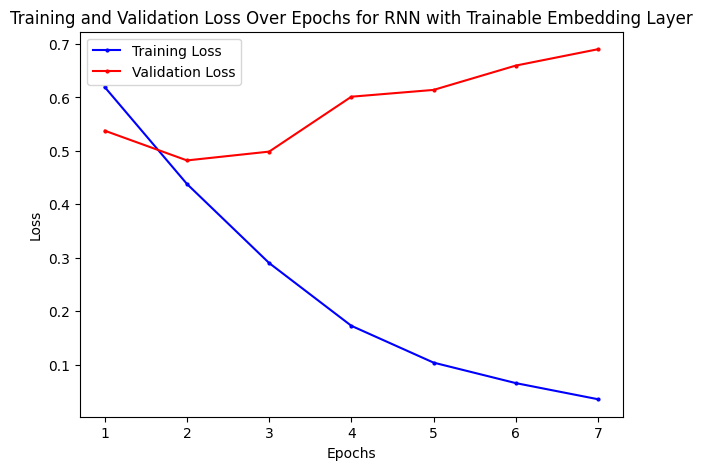

In [ ]:
train_loss_plot = history.history['loss']
val_loss_plot = history.history['val_loss']
epochs_range = range(1, len(train_loss_plot) + 1)
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(epochs_range, train_loss_plot, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(epochs_range, val_loss_plot, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for RNN with Trainable Embedding Layer')
plt.legend()
plt.show()

### RNN with OOV being handled

In [ ]:
vocab_size, embedding_dim = embedding_matrix_vocab_oov.shape

In [ ]:
# Prepare training and validation dataset
validation_text = validation_dataset['text']
preprocessed_validation_text = []

for text in validation_text:
  preprocessed_text = preprocess_text(text)
  preprocessed_validation_text.append(preprocessed_text)

# Prepare test dataset
test_text = test_dataset['text']
preprocessed_test_text = []

for text in test_text:
  preprocessed_text = preprocess_text(text)
  preprocessed_test_text.append(preprocessed_text)

indexed_training_text = string_to_indices(preprocessed_training_text, new_vocab_index, max_len)
indexed_validation_text = string_to_indices(preprocessed_validation_text, new_vocab_index, max_len)
indexed_test_text = string_to_indices(preprocessed_test_text, new_vocab_index, max_len)

X_train = np.array(indexed_training_text)
y_train = np.array(train_dataset['label'])
X_val = np.array(indexed_validation_text)
y_val = np.array(validation_dataset['label'])
X_test = np.array(indexed_test_text)
y_test = np.array(test_dataset['label'])

In [ ]:
# Optimal epoch = 15 (RERUN) Optimal epoch = 15
early_stopping = EarlyStopping(monitor = 'val_loss',
                                patience = 5,
                                restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

model_max_pooling = Sequential(name = 'Simple_RNN')
model_max_pooling.add(Embedding(input_dim = vocab_size,
                    output_dim = embedding_dim,
                    input_length = max_len,
                    weights = [embedding_matrix_vocab_oov],
                    trainable = True)) # to train the embedding layer

model_max_pooling.add(SimpleRNN(128, activation = 'tanh', return_sequences = True))
model_max_pooling.add(GlobalMaxPooling1D())
model_max_pooling.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_max_pooling.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model_max_pooling.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 15,
                      batch_size = 32,
                      callbacks = [early_stopping, reduce_lr],
                      verbose = 1)

model_max_pooling.summary()

val_loss, val_accuracy = model_max_pooling.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_max_pooling.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.5942 - loss: 0.6607 - val_accuracy: 0.7336 - val_loss: 0.5347 - learning_rate: 0.0010
Epoch 2/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7616 - loss: 0.4872 - val_accuracy: 0.7617 - val_loss: 0.4862 - learning_rate: 0.0010
Epoch 3/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8579 - loss: 0.3406 - val_accuracy: 0.7674 - val_loss: 0.5042 - learning_rate: 0.0010
Epoch 4/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9230 - loss: 0.2154 - val_accuracy: 0.7270 - val_loss: 0.6407 - learning_rate: 0.0010
Epoch 5/15
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9569 - loss: 0.1376
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9570 - loss: 0.1375 - val_accuracy: 0.7692 - val_loss: 0.5942 - learning_rate: 0.0010
Epoch 6/15
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9744 - loss:

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ (None, 31, 100)             │       1,619,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 31, 128)             │          29,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_23              │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,945,925 (18.87 MB)

 Trainable params: 1,648,641 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,297,284 (12.58 MB)

Validation Accuracy: 0.7617260813713074
Test Accuracy: 0.7898686528205872


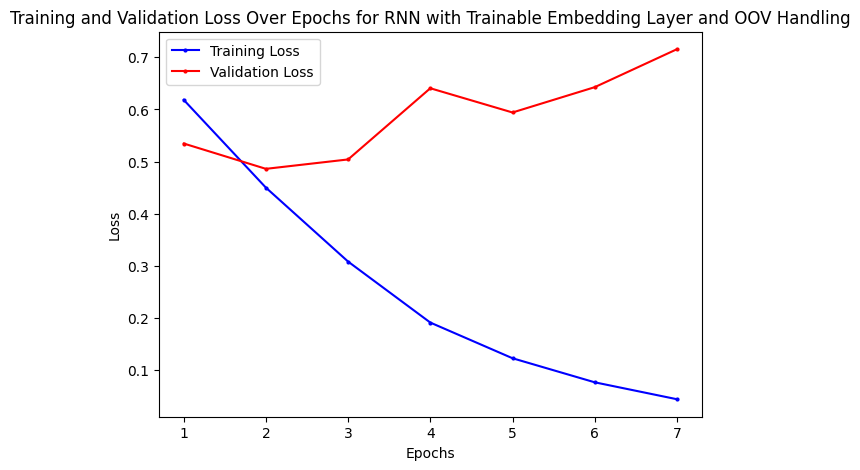

In [ ]:
train_loss_plot = history.history['loss']
val_loss_plot = history.history['val_loss']
epochs_range = range(1, len(train_loss_plot) + 1)
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(epochs_range, train_loss_plot, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(epochs_range, val_loss_plot, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for RNN with Trainable Embedding Layer and OOV Handling')
plt.legend()
plt.show()

### biLSTM

In [ ]:
# Model w oov embedding
def sentiment_biLSTM_oov (vocabSize,embeddingDim,hidden_dim,maxLen,numLayers,dropout_rate = 0.5):
  # Create input layer (max_length)
  inputs = Input(shape=(max_len,))
  # Trainable embedding layer
  x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, trainable=True, mask_zero=True,weights=[embedding_matrix_vocab_oov])(inputs)
  for i in range(numLayers):
    x = Bidirectional(LSTM(hidden_dim, return_sequences=True))(x)
    x = Dropout(dropout_rate)(x)
  max_pool= GlobalMaxPooling1D()(x)
  outputs = Dense(1, activation='sigmoid')(max_pool)
  model = Model(inputs, outputs)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,weight_decay=1e-5)
  model.compile(optimizer= optimizer,loss='binary_crossentropy', metrics=['accuracy'])
  return model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)
hidden_dim = 128
model_bilstm = sentiment_biLSTM_oov(vocab_size, embedding_dim, hidden_dim, max_len,3)
history = model_bilstm.fit(
  X_train, y_train,
  epochs=30,
  batch_size=16,
  validation_data=(X_val, y_val),
  callbacks=[early_stopping,reduce_lr])

model_bilstm.summary()

val_loss, val_accuracy = model_bilstm.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_bilstm.evaluate(X_test, y_test, verbose = 0)
print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_max_pooling1d_16' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


534/534 ━━━━━━━━━━━━━━━━━━━━ 234s 402ms/step - accuracy: 0.6611 - loss: 0.6117 - val_accuracy: 0.7617 - val_loss: 0.5361 - learning_rate: 0.0010
Epoch 2/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 262s 402ms/step - accuracy: 0.8174 - loss: 0.4059 - val_accuracy: 0.7899 - val_loss: 0.4577 - learning_rate: 0.0010
Epoch 3/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 266s 410ms/step - accuracy: 0.9037 - loss: 0.2448 - val_accuracy: 0.7814 - val_loss: 0.5149 - learning_rate: 0.0010
Epoch 4/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 264s 414ms/step - accuracy: 0.9579 - loss: 0.1329 - val_accuracy: 0.7814 - val_loss: 0.5683 - learning_rate: 0.0010
Epoch 5/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.9777 - loss: 0.0660
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
534/534 ━━━━━━━━━━━━━━━━━━━━ 253s 396ms/step - accuracy: 0.9778 - loss: 0.0660 - val_accuracy: 0.7636 - val_loss: 0.6782 - learning_rate: 0.0010
Epoch 6/30
534/534 ━━━━━━━━━━━━━━━━━━━━ 213s 399ms/step - accuracy: 0.9906 - l

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 31)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_21 (Embedding)  │ (None, 31, 100)        │      1,619,200 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_6 (NotEqual)    │ (None, 31)             │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_26          │ (None, 31, 256)        │        234,496 │ embedding_21[0][0],    │
│ (Bidirectional)           │                        │                │ not_equal_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 31, 256)        │              0 │ bidirectional_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_27          │ (None, 31, 256)        │        394,240 │ dropout_18[0][0],      │
│ (Bidirectional)           │                        │                │ not_equal_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 31, 256)        │              0 │ bidirectional_27[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_28          │ (None, 31, 256)        │        394,240 │ dropout_19[0][0],      │
│ (Bidirectional)           │                        │                │ not_equal_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 31, 256)        │              0 │ bidirectional_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_16   │ (None, 256)            │              0 │ dropout_20[0][0]       │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 1)              │            257 │ global_max_pooling1d_… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,927,301 (30.24 MB)

 Trainable params: 2,642,433 (10.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,284,868 (20.16 MB)

Validation Accuracy: 0.7898686528205872
Test Accuracy: 0.801125705242157


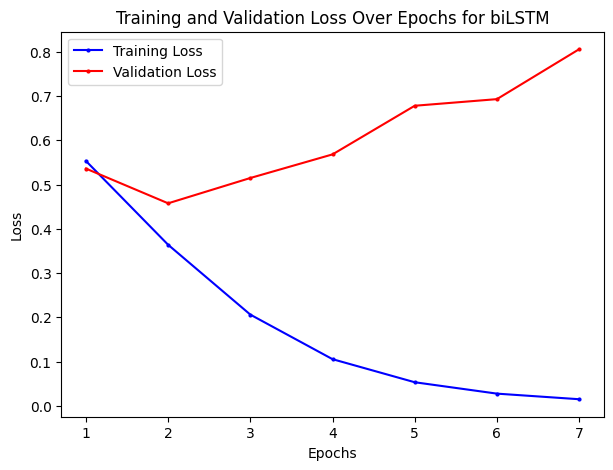

In [ ]:
train_loss_plot = history.history['loss']
val_loss_plot = history.history['val_loss']
epochs_range = range(1, len(train_loss_plot) + 1)
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(epochs_range, train_loss_plot, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(epochs_range, val_loss_plot, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for biLSTM')
plt.legend()
plt.show()

### biGRU

In [ ]:
# Create the biGRU model
model_bigru = Sequential(name='RNN_biGRU', layers=[
                        Embedding(input_dim=vocab_size,
                                  output_dim=embedding_dim,
                                  input_length=max_len,
                                  weights=[embedding_matrix_vocab_oov]),
                        Bidirectional(GRU(16, return_sequences=True)),
                        Bidirectional(GRU(16, return_sequences=True)),
                        GlobalMaxPooling1D(),
                        Dense(1, activation='sigmoid')
                        ])

optimizer = tf.keras.optimizers.Adam(learning_rate = 2e-3)

# Compile the model
model_bigru.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',
                              patience = 5,
                              restore_best_weights = True)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              min_lr=0.00001,
                              verbose=1)

# Train the model
history = model_bigru.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 20,
                    batch_size = 32,
                    callbacks = [early_stopping, reduce_lr],
                    verbose = 1)

model_bigru.summary()
model_bigru.build(input_shape = (None, max_len))

# Evaluate the model using validation dataset
val_loss, val_accuracy = model_bigru.evaluate(X_val, y_val, verbose = 0)
test_loss, test_accuracy = model_bigru.evaluate(X_test, y_test, verbose = 0)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.6352 - loss: 0.6274 - val_accuracy: 0.7664 - val_loss: 0.4675 - learning_rate: 0.0020
Epoch 2/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.8308 - loss: 0.3780 - val_accuracy: 0.7767 - val_loss: 0.5163 - learning_rate: 0.0020
Epoch 3/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9340 - loss: 0.1784 - val_accuracy: 0.7617 - val_loss: 0.6770 - learning_rate: 0.0020
Epoch 4/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9797 - loss: 0.0654
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.
267/267 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.9797 - loss: 0.0653 - val_accuracy: 0.7552 - val_loss: 0.8781 - learning_rate: 0.0020
Epoch 5/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.7655 - val_loss: 0.9726 - learning_rate: 0.0010
Epoch 6/20
267/267 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9976 - lo

Model: "RNN_biGRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)             │ (None, 31, 100)             │       1,619,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_31 (Bidirectional)     │ (None, 31, 32)              │          11,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_32 (Bidirectional)     │ (None, 31, 32)              │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_20              │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,906,085 (18.72 MB)

 Trainable params: 1,635,361 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,270,724 (12.48 MB)

Validation Accuracy: 0.7664164900779724
Test Accuracy: 0.7964352965354919


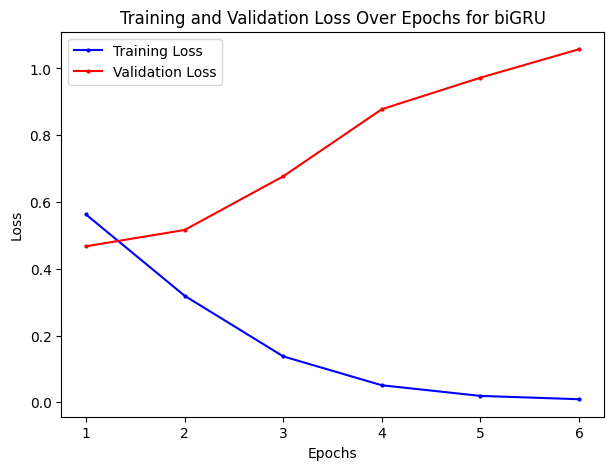

In [ ]:
train_loss_plot = history.history['loss']
val_loss_plot = history.history['val_loss']
epochs_range = range(1, len(train_loss_plot) + 1)
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(epochs_range, train_loss_plot, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(epochs_range, val_loss_plot, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for biGRU')
plt.legend()
plt.show()

### CNN

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

input_layer = Input(shape=(max_len,), name='Input')

embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix_vocab_oov],
                            input_length=max_len,
                            trainable=True)(input_layer)

cnn_output = Conv1D(256,
                    kernel_size=5,
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.001))(embedding_layer)

max_pool = GlobalMaxPooling1D()(cnn_output)

dropout = Dropout(0.5)(max_pool)
output_layer = Dense(1, activation='sigmoid')(dropout)

model_cnn = Model(inputs=input_layer, outputs=output_layer, name='CNN')

optimizer = keras.optimizers.Adam(learning_rate = 0.001)

model_cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model_cnn.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 10, batch_size=32,
                    callbacks=[early_stopping, lr_scheduler],
                    verbose = 1)

model_cnn.summary()

val_loss, val_accuracy = model_cnn.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy}")

test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test, verbose = 0)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5969 - loss: 0.8443 - val_accuracy: 0.7523 - val_loss: 0.6467 - learning_rate: 0.0010
Epoch 2/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.7680 - loss: 0.5865 - val_accuracy: 0.7598 - val_loss: 0.5980 - learning_rate: 0.0010
Epoch 3/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.8457 - loss: 0.4642 - val_accuracy: 0.7608 - val_loss: 0.5976 - learning_rate: 0.0010
Epoch 4/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9028 - loss: 0.3545 - val_accuracy: 0.7767 - val_loss: 0.6267 - learning_rate: 0.0010
Epoch 5/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9390 - loss: 0.2746 - val_accuracy: 0.7627 - val_loss: 0.6817 - learning_rate: 0.0010
Epoch 6/10
267/267 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9649 - loss: 0.2083 - val_accuracy: 0.7589 - val_loss: 0.7418 - learning_rate: 0.0010


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 31)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_24 (Embedding)             │ (None, 31, 100)             │       1,619,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 27, 256)             │         128,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_19              │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,243,141 (20.00 MB)

 Trainable params: 1,747,713 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,495,428 (13.33 MB)

Validation Accuracy: 0.7607879638671875
Test Accuracy: 0.7804877758026123


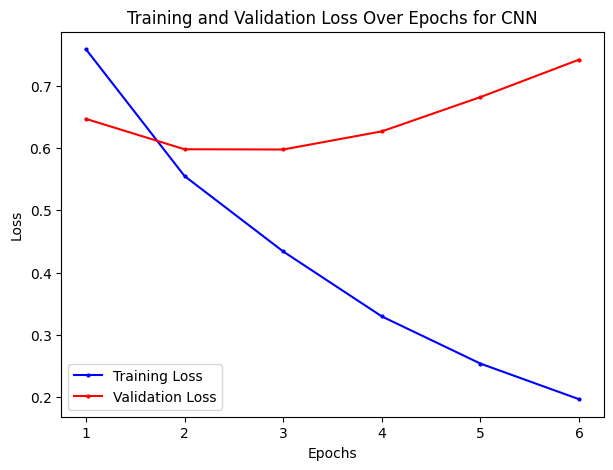

In [ ]:
train_loss_plot = history.history['loss']
val_loss_plot = history.history['val_loss']
epochs_range = range(1, len(train_loss_plot) + 1)
# Plot the loss to determine optimal epochs
plt.figure(figsize = (7,5))
plt.plot(epochs_range, train_loss_plot, label = 'Training Loss', color = 'blue', marker = 'o', ms = 2)
plt.plot(epochs_range, val_loss_plot, label = 'Validation Loss', color = 'red', marker = 'o', ms = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for CNN')
plt.legend()
plt.show()

### Enhancement - Ensembling Method

In [ ]:
from sklearn.linear_model import LogisticRegression

# Get predictions from base models on the validation set
biGRU_preds = model_bigru.predict(X_val)
CNN_preds = model_cnn.predict(X_val)
biLSTM_preds = model_bilstm.predict(X_val)

# Stack the predictions
stacked_preds = np.column_stack((biGRU_preds, CNN_preds, biLSTM_preds))

meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacked_preds, y_val)

# Get predictions from base models on the test set
biGRU_preds_test = model_bigru.predict(X_test)
CNN_preds_test = model_cnn.predict(X_test)
biLSTM_preds_test = model_bilstm.predict(X_test)

stacked_preds_test = np.column_stack((biGRU_preds_test, CNN_preds_test, biLSTM_preds_test))

final_preds = meta_model.predict(stacked_preds_test)

# Calculate final accuracy on the test set
final_accuracy = np.mean(final_preds == y_test)
print(f'Final Stacked Model Test Accuracy: {final_accuracy}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_max_pooling1d_16' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step
Final Stacked Model Test Accuracy: 0.8105065666041276
